# <center> ****Sentiment Analysis on IMDB Movie Reviews****

## **Introduction:**

In an era dominated by digital platforms, user-generated content shapes opinions and influences decisions. Understanding sentiments within this vast sea of information is crucial. The "Sentiment Analysis on IMDB Movie Reviews" project embarks on the journey of extracting sentiments from movie reviews to classify them as positive or negative.

## **Objective:**

The primary objective of this project is to develop an Artificial Neural Network (ANN) model that can effectively distinguish sentiments expressed in movie reviews. Leveraging the IMDB dataset, a collection of 50,000 reviews categorized as positive or negative, the model will undergo training to comprehend the intricate patterns and nuances of human expression.

## **Dataset:**

The IMDB dataset, provided by Keras, is a rich source of real-world movie reviews. Each review has been meticulously preprocessed, representing sequences of integers corresponding to specific words. The dataset is divided into training and testing sets, ensuring a robust evaluation of the model's performance.

## **Methodology:**

The project employs a deep learning approach, utilizing an ANN architecture to capture the intricate relationships and contextual dependencies within the textual data. By converting words into numerical sequences, the model learns to discern positive and negative sentiments, ultimately providing a tool to automate the sentiment analysis of movie reviews.

## **Why Sentiment Analysis?**

Sentiment analysis holds immense practical significance in various domains, including marketing, public opinion analysis, and product development. This project not only hones your skills in neural network implementation but also equips you with a powerful tool for extracting valuable insights from user-generated content.

## **Conclusion:**

By the end of this project, you will have developed a robust sentiment analysis model, enhancing your proficiency in deep learning and natural language processing. This endeavor contributes not only to your technical repertoire but also to the broader landscape of sentiment analysis applications.

## Loading tn imdb sataset

Keras includes the IMDB dataset, which is already preprocessed. The reviews, initially comprised of sequences of words, have been transformed into sequences of integers. Each integer corresponds to a specific word in a dictionary.

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The parameter "num_words=10000" signifies that only the top 10,000 most frequently appearing words in the training data will be retained. Less common words will be excluded, streamlining the vector data to a manageable size.

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

## Preparing the data

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Here’s what the samples look like now:

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# vectorizing the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the network

In [9]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

##  Compiling the model

In [10]:
from keras import optimizers, losses, metrics

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

## Setting aside a validation set

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training your model

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


30/30 [==============================] - 8s 87ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6931 -

## Plotting the training and validation loss

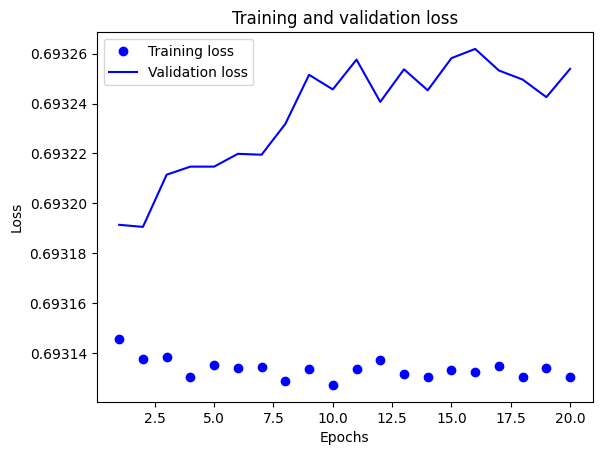

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

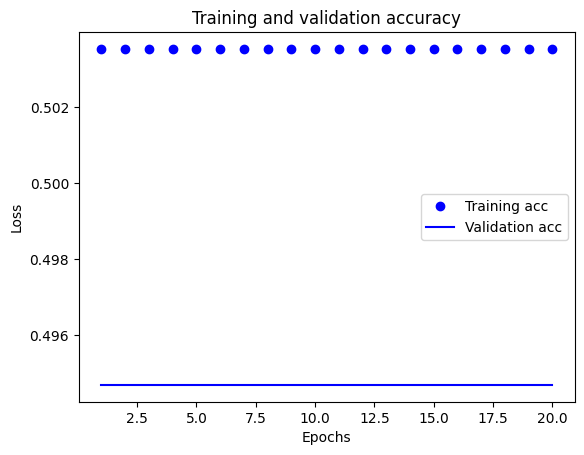

In [15]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.6932 - accuracy: 0.4974
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.4964
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.4936
Epoch 4/4
782/782 [==============================] - 15s 3ms/step - loss: 0.6931 - accuracy: 0.5000


In [17]:
 results

[0.6931489109992981, 0.5]